In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

In [2]:
%matplotlib notebook

In [3]:
g = 9.8
L = 2 #length of the pendulum in meters

In [4]:
def der_state(t, state):
        """compute the derivative of the given state"""

        der = np.zeros_like(state)
        der[0] = state[1]
        der[1] = -(g/L)*np.sin(state[0])
        return der

In [5]:
tf = 25 #simulation for tf seconds
n = 1000 #number of evaluation points
dt = tf/n
T = np.linspace(0.0, tf, n+1)

In [6]:
state0 = ([np.pi/4, 0.2]) #this is the initial state

In [7]:
sol = integrate.solve_ivp(der_state, (0, tf), state0, t_eval=T)
ang_pos = sol.y[0]

In [8]:
# Cartesian coordinates
x = L*np.sin(ang_pos)
y = -L*np.cos(ang_pos) #the y-axis points down

<IPython.core.display.Javascript object>


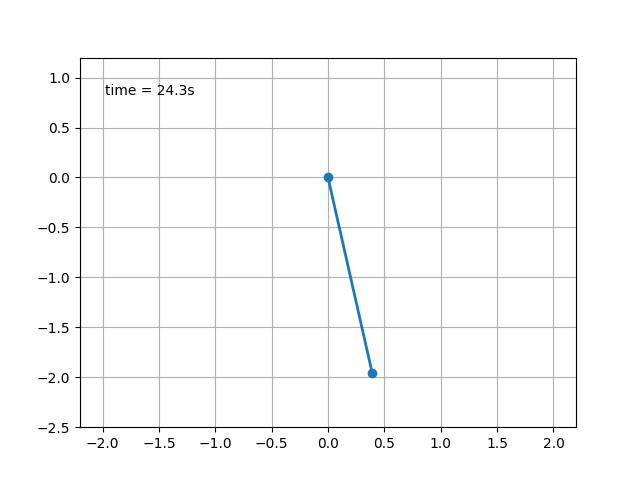

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2.2, 2.2), ylim=(-2.5, 1.2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = '
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x[i]] #the pendulum is anchored at (0,0)
    thisy = [0, y[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template + '{:4.1f}'.format(i*dt) + 's')
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(T)),
                              interval=20, blit=True, init_func=init)